In [47]:
using StatsBase
using Plots
using JLD2
using Graphs
using SimpleWeightedGraphs
using BlossomV
using GraphsMatching

In [50]:
include("../src/main.jl")
include("../src/mwpm.jl")
include("../src/local.jl")
include("../src/circuits.jl")

TOOM_sample (generic function with 2 methods)

In [ ]:
# jldsave("25_08_20.jld2"; adv_MWPM_data, basic_MWPM_data, MV_data)

In [65]:
adv_MWPM_data = Dict{Tuple{Int,Int,Float64,Float64,Float64}, Tuple{Vector,Vector}}()
basic_MWPM_data = Dict{Tuple{Int,Int,Float64,Float64}, Tuple{Vector,Vector}}()
MV_data = Dict{Tuple{Int,Int,Float64,Float64}, Tuple{Vector,Vector}}()


Dict{Tuple{Int64, Int64, Float64, Float64}, Tuple{Vector, Vector}}()

In [ ]:
# p = 0.1
# q = 0.1
# samples = 1000

# for L in 4:4:12
#     T = 2L
#     for peff in 0.1:0.05:0.5
#         println("L: $L, T: $T, peff: $peff")
#         adv_MWPM_data[(L, T, p, peff, q)] = adv_MWPM_sample(L, T, p, peff, q, samples)
#     end
# end


L: 4, T: 8, peff: 0.1
L: 4, T: 8, peff: 0.15
L: 4, T: 8, peff: 0.2
L: 4, T: 8, peff: 0.25
L: 4, T: 8, peff: 0.3
L: 4, T: 8, peff: 0.35
L: 4, T: 8, peff: 0.4
L: 4, T: 8, peff: 0.45
L: 4, T: 8, peff: 0.5
L: 8, T: 16, peff: 0.1
L: 8, T: 16, peff: 0.15
L: 8, T: 16, peff: 0.2
L: 8, T: 16, peff: 0.25
L: 8, T: 16, peff: 0.3
L: 8, T: 16, peff: 0.35
L: 8, T: 16, peff: 0.4
L: 8, T: 16, peff: 0.45
L: 8, T: 16, peff: 0.5
L: 12, T: 24, peff: 0.1
L: 12, T: 24, peff: 0.15
L: 12, T: 24, peff: 0.2
L: 12, T: 24, peff: 0.25
L: 12, T: 24, peff: 0.3
L: 12, T: 24, peff: 0.35
L: 12, T: 24, peff: 0.4
L: 12, T: 24, peff: 0.45
L: 12, T: 24, peff: 0.5


In [86]:
p = 0.1
q = 0.1
samples = 1

for L in 16:4:20
    T = 100L
    MV_data[(L, T, p, q)] = MV_sample(L, T, p, q, samples)
end


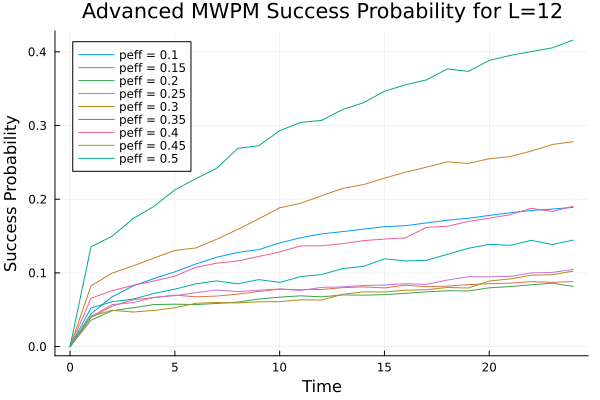

In [79]:
p = 0.1
q = 0.1

L = 12
plt = plot()

for peff in 0.1:0.05:0.5
    T = 2L
    ts = collect(0:T)
    xs = adv_MWPM_data[(L, T, p, peff, q)][1]

    plot!(plt, ts, xs, label="peff = $peff", xlabel="Time", ylabel="Success Probability", title="Advanced MWPM Success Probability for L=$L")
end

plt


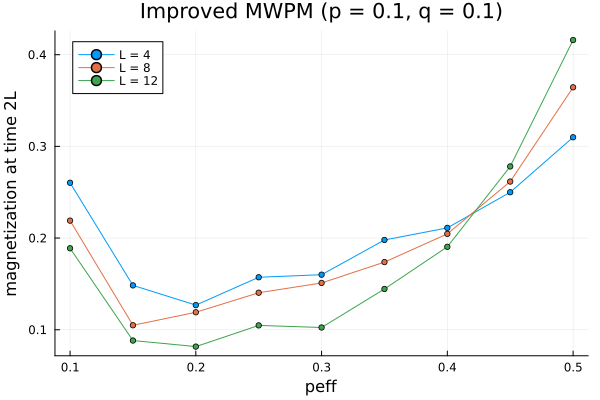

In [95]:
p = 0.1
q = 0.1

plt = plot()

for L in 4:4:12
    xs = 0.1:0.05:0.5
    ys = [adv_MWPM_data[(L, 2L, p, peff, q)][1][end] for peff in xs]
    plt = plot!(plt, xs, ys, label="L = $L", xlabel="peff", ylabel="magnetization at time 2L", title="Improved MWPM (p = 0.1, q = 0.1)", m=3)
end
savefig(plt, "improved_mwpm_peff.pdf")
plt

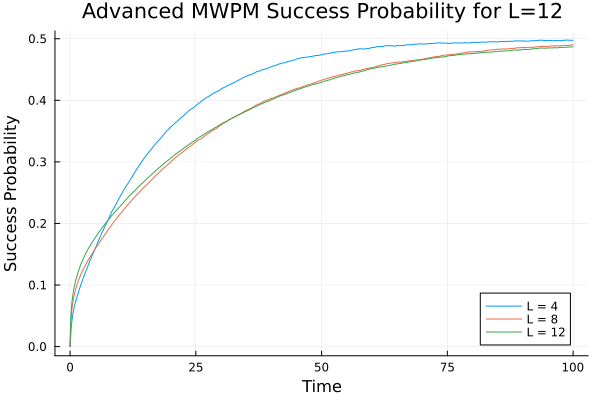

In [85]:
p = 0.1
q = 0.1

plt = plot()

for L in 4:4:12
    T = 100L
    ts = collect(0:T)
    xs = MV_data[(L, T, p, q)][1]

    plot!(plt, ts/L, xs, label="L = $L", xlabel="Time", ylabel="Success Probability", title="Advanced MWPM Success Probability for L=$L")
end

plt


In [58]:
L = 4
T = 2L
p = 0.1
q = 0.1
peff = 0.5
samples = 1

adv_MWPM_sample(L, T, p, peff, q, samples)

([0.0, 0.0, 0.125, 0.0, 0.5, 0.9375, 0.9375, 1.0, 0.875], [0.0, 0.0, 0.015625, 0.0, 0.25, 0.87890625, 0.87890625, 1.0, 0.765625])

In [ ]:
adv_M

In [54]:
q = 0.1
samples = 2

for L in 4:4:12
    T = 10L
    for p in 0.0:0.05:0.5
        println("L = $L, T = $T, p = $p, q = $q")
        for algo in ["basic_MWPM", "MV"]
            println("Running algorithm: $algo")
            if algo == "basic_MWPM"
                basic_MWPM_data[(L, T, p, q)] = basic_MWPM_sample(L, T, p, q, samples)
            elseif algo == "MV"
                MV_data[(L, T, p, q)] = MV_sample(L, T, p, q, samples)
            end
        end
    end
end


L = 4, T = 40, p = 0.0, q = 0.1
Running algorithm: basic_MWPM
Running algorithm: MV
L = 4, T = 40, p = 0.05, q = 0.1
Running algorithm: basic_MWPM
Running algorithm: MV
L = 4, T = 40, p = 0.1, q = 0.1
Running algorithm: basic_MWPM
Running algorithm: MV
L = 4, T = 40, p = 0.15, q = 0.1
Running algorithm: basic_MWPM
Running algorithm: MV
L = 4, T = 40, p = 0.2, q = 0.1
Running algorithm: basic_MWPM
Running algorithm: MV
L = 4, T = 40, p = 0.25, q = 0.1
Running algorithm: basic_MWPM
Running algorithm: MV
L = 4, T = 40, p = 0.3, q = 0.1
Running algorithm: basic_MWPM
Running algorithm: MV
L = 4, T = 40, p = 0.35, q = 0.1
Running algorithm: basic_MWPM
Running algorithm: MV
L = 4, T = 40, p = 0.4, q = 0.1
Running algorithm: basic_MWPM
Running algorithm: MV
L = 4, T = 40, p = 0.45, q = 0.1
Running algorithm: basic_MWPM
Running algorithm: MV
L = 4, T = 40, p = 0.5, q = 0.1
Running algorithm: basic_MWPM
Running algorithm: MV
L = 8, T = 80, p = 0.0, q = 0.1
Running algorithm: basic_MWPM
Running a

InterruptException: InterruptException:

In [39]:
L = 12
T = 10L
p = 0.1
q = 0.1
peff = 0.1
samples = 10

adv_MWPM_sample(L, T, p, peff, q, samples)

([0.0, 0.049305555555555554, 0.07569444444444444, 0.07430555555555556, 0.10833333333333332, 0.11250000000000002, 0.1125, 0.14444444444444443, 0.14097222222222222, 0.13611111111111113  …  0.5256944444444445, 0.5326388888888889, 0.5583333333333333, 0.5513888888888888, 0.5423611111111111, 0.5409722222222222, 0.5555555555555556, 0.5590277777777778, 0.5673611111111112, 0.5791666666666668], [0.0, 0.0028115354938271606, 0.0067756558641975315, 0.00669849537037037, 0.015027006172839507, 0.014891975308641975, 0.015422453703703709, 0.02828896604938272, 0.02944155092592593, 0.020679012345679013  …  0.40269579475308637, 0.3962914737654321, 0.4299479166666667, 0.4255979938271605, 0.41439525462962956, 0.42218846450617287, 0.426099537037037, 0.4269241898148148, 0.4349681712962963, 0.4375771604938272])

In [40]:
L = 12
T = 10L
p = 0.1
q = 0.1
peff = 0.1
samples = 10

basic_MWPM_sample(L, T, p, q, samples)

([0.0, 0.15486111111111114, 0.24513888888888893, 0.2326388888888889, 0.28194444444444444, 0.18402777777777776, 0.17291666666666666, 0.21458333333333335, 0.17152777777777778, 0.19722222222222224  …  0.4416666666666667, 0.5208333333333333, 0.50625, 0.4875, 0.4527777777777778, 0.3583333333333333, 0.4763888888888889, 0.4881944444444445, 0.4638888888888889, 0.41597222222222224], [0.0, 0.046059992283950614, 0.09695698302469136, 0.1375048225308642, 0.14555362654320986, 0.1052710262345679, 0.09795042438271603, 0.0902150848765432, 0.07285397376543211, 0.09099151234567901  …  0.32367862654320984, 0.4140432098765432, 0.39474826388888895, 0.3721257716049382, 0.31026234567901234, 0.25357831790123453, 0.3519000771604938, 0.356322337962963, 0.36171875, 0.3227189429012346])

In [31]:
L = 4
T = 10L
p = 0.1
q = 0.1
peff = 0.1
samples = 100

MV_sample(L, T, p, q, samples)

([0.0, 0.030625, 0.04125, 0.05625, 0.066875, 0.075, 0.098125, 0.09375, 0.0875, 0.100625  …  0.220625, 0.230625, 0.218125, 0.230625, 0.22375, 0.223125, 0.235, 0.25125, 0.248125, 0.24125], [0.0, 0.0036328125, 0.0053125, 0.0090625, 0.0139453125, 0.01921875, 0.0283203125, 0.02671875, 0.024765625, 0.0289453125  …  0.1469140625, 0.1577734375, 0.1437890625, 0.1580078125, 0.163125, 0.1591015625, 0.1653125, 0.17546875, 0.1799609375, 0.172890625])

In [32]:
L = 4
T = 10L
p = 0.1
q = 0.1
peff = 0.1
samples = 100

TOOM_sample(L, T, p, q, samples)

([0.0, 0.0575, 0.09125, 0.13625, 0.144375, 0.17875, 0.180625, 0.198125, 0.225625, 0.253125  …  0.43375, 0.423125, 0.429375, 0.4225, 0.42125, 0.395625, 0.381875, 0.38, 0.396875, 0.39], [0.0, 0.0090625, 0.018984375, 0.0365625, 0.0406640625, 0.05765625, 0.0612890625, 0.0704296875, 0.0882421875, 0.1065234375  …  0.2775, 0.2724609375, 0.2836328125, 0.267109375, 0.27109375, 0.2497265625, 0.2339453125, 0.23109375, 0.2354296875, 0.22953125])

In [46]:
jldopen("../output/sample_algo=adv_MWPM_L=4_T=40_p=0p000_q=0p000_peff=0p250_samples=100000_20250819_052937_123656909.jld2")["M1s"]

41-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [43]:
jldopen("/Users/jhauser/Code/single_shot/output/sample_algo=basic_MWPM_L=8_T=16_p=0p300_q=0p100_samples=2_20250819_014032_1806758375.jld2")["M1s"]

17-element Vector{Float64}:
 0.0
 0.0703125
 0.03125
 0.046875
 0.2890625
 0.5234375
 0.4921875
 0.46875
 0.421875
 0.515625
 0.5078125
 0.6171875
 0.5234375
 0.53125
 0.46875
 0.7109375
 0.6171875

In [44]:
jldopen("/Users/jhauser/Code/single_shot/output/sample_algo=adv_MWPM_L=8_T=16_p=0p300_q=0p100_peff=0p150_samples=2_20250819_014129_197557466.jld2")["M1s"]

17-element Vector{Float64}:
 0.0
 0.1171875
 0.265625
 0.2265625
 0.203125
 0.03125
 0.375
 0.546875
 0.453125
 0.21875
 0.1171875
 0.2265625
 0.109375
 0.2265625
 0.4140625
 0.3515625
 0.1875